In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

## Data Preprocessing

In [5]:
# Ensure the file path uses raw string or double backslashes for Windows
file_path = r"E:\ammar\eatRight\dataset\obesity classification\ObesityDataSet_raw_and_data_sinthetic.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Encode categorical variables
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                       'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the encoder for potential inverse transformations

# Normalize continuous variables
continuous_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

# Display the first few rows to confirm
print(data.head())


        Age  Gender    Height    Weight  CALC  FAVC      FCVC       NCP  SCC  \
0 -0.522124       0 -0.875589 -0.862558     3     0 -0.785019  0.404153    0   
1 -0.522124       0 -1.947599 -1.168077     2     0  1.088342  0.404153    1   
2 -0.206889       1  1.054029 -0.366090     1     0 -0.785019  0.404153    0   
3  0.423582       1  1.054029  0.015808     1     0  1.088342  0.404153    0   
4 -0.364507       1  0.839627  0.122740     2     0 -0.785019 -2.167023    0   

   SMOKE      CH2O  family_history_with_overweight       FAF       TUE  CAEC  \
0      0 -0.013073                               1 -1.188039  0.561997     2   
1      1  1.618759                               1  2.339750 -1.080625     2   
2      0 -0.013073                               1  1.163820  0.561997     2   
3      0 -0.013073                               0  1.163820 -1.080625     2   
4      0 -0.013073                               0 -1.188039 -1.080625     2   

   MTRANS  NObeyesdad  
0       3     

In [6]:
# Separate features and target variable
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

In [7]:
# Convert target variable to categorical (multi-class classification)
y = to_categorical(y)

In [8]:
# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [9]:
# Build the Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

In [10]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
47/47 [==============================] - 0s 8ms/step - loss: 0.1665 - accuracy: 0.9425 - val_loss: 0.1462 - val_accuracy: 0.9495
Epoch 2/50
47/47 [==============================] - 0s 8ms/step - loss: 0.1856 - accuracy: 0.9303 - val_loss: 0.1384 - val_accuracy: 0.9653
Epoch 3/50
47/47 [==============================] - 0s 7ms/step - loss: 0.2039 - accuracy: 0.9248 - val_loss: 0.1670 - val_accuracy: 0.9464
Epoch 4/50
47/47 [==============================] - 0s 6ms/step - loss: 0.1804 - accuracy: 0.9357 - val_loss: 0.1383 - val_accuracy: 0.9590
Epoch 5/50
47/47 [==============================] - 0s 7ms/step - loss: 0.1724 - accuracy: 0.9445 - val_loss: 0.1486 - val_accuracy: 0.9527
Epoch 6/50
47/47 [==============================] - 0s 6ms/step - loss: 0.1975 - accuracy: 0.9296 - val_loss: 0.1347 - val_accuracy: 0.9558
Epoch 7/50
47/47 [==============================] - 0s 6ms/step - loss: 0.1890 - accuracy: 0.9323 - val_loss: 0.1416 - val_accuracy: 0.9527
Epoch 8/50
47/47 [==

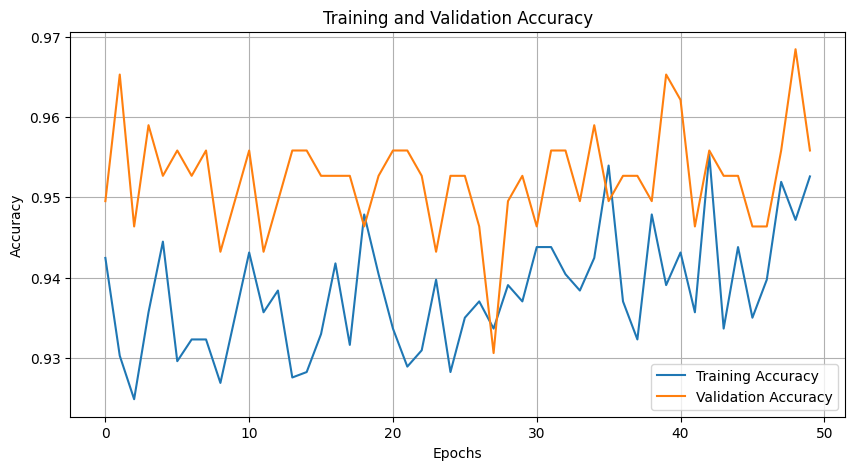

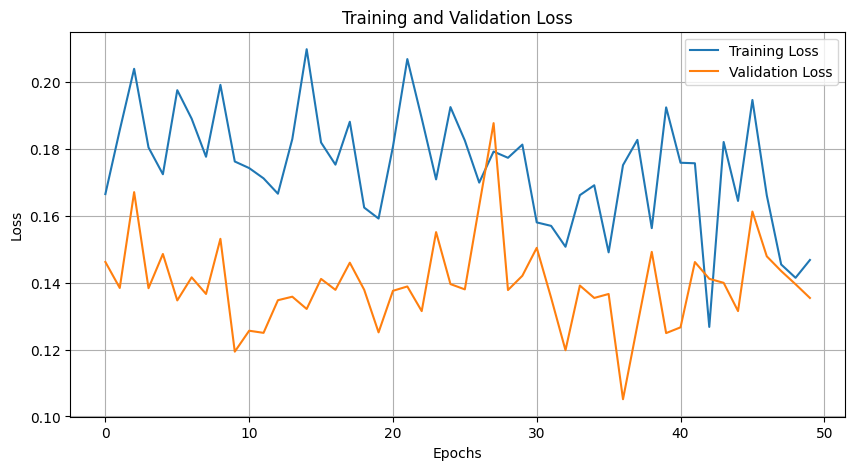

In [15]:
import matplotlib.pyplot as plt

def plot_training_results(history):
    """
    Plots the training and validation accuracy and loss curves.
    :param history: Training history object returned by model.fit()
    """
    # Plot training and validation accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with your history object
plot_training_results(history)

In [16]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.157936692237854
Test Accuracy: 0.9589905142784119


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
print(confusion_matrix(y_true_classes, y_pred_classes))

10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        50
           1       0.91      0.91      0.91        44
           2       0.98      1.00      0.99        47
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00        45
           5       0.89      0.91      0.90        34
           6       1.00      0.89      0.94        46

    accuracy                           0.96       317
   macro avg       0.96      0.96      0.96       317
weighted avg       0.96      0.96      0.96       317

[[49  1  0  0  0  0  0]
 [ 4 40  0  0  0  0  0]
 [ 0  0 47  0  0  0  0]
 [ 0  0  0 51  0  0  0]
 [ 0  0  0  0 45  0  0]
 [ 0  3  0  0  0 31  0]
 [ 0  0  1  0  0  4 41]]


In [18]:
model.save("obesity_prediction_model.h5")